## MSDS 7333 – Unit 4 Case Study
Albert Asuncion, Brian Lee, Ethan Graham, Melina Shulyak

Assignment: Financial Applications of Time Series<br>
* Choose either the Signal Frontier Analysis application or Future Contract Rolling application.
* Use different stocks than those shown in examples.
* Create iPython Notebook, including code, output, and graphics.
* Include an introduction in your notebook to give background on your application.
* Be sure to explain calculations and output in the appropriate places.
* List outside references if used.<br>

Formatting<br>

Case study write-ups are to be “technical report ready,” which basically means that the write-up is suitable for public viewing.

* Your name must be at the beginning of the notebook.
* The notebook should divided into an abstract, an introduction, a methods section, a results section, and a future work/discussion/conclusion section.
* Use an easy-to-read variable-width font (I like Ariel, Helvetica, and Geneva font) with a minimum of 11 point font.
* Relevant code and output must be explained in the notebook as close to the code/output as possible.
* Any graphics generated using the code must be explained in the notebook as close to the graphic as possible.

>## Abstract<b>
The futures market is 

*Abstract text placeholder*

## Introduction

__History and Origin of Futures.__
Futures trading evolved out of the need for buyers and sellers of goods to mitigate against price volatility and the counterparty risks inherent between parties to a transaction. When a producer of grain expects his crops to grow to maturity at a future time, his foremost concern is a price he can plan for and come harvest the assurance of a buyer for his crop. Thus in 1948, as the Great Lakes became linked to the Mississippi River via railroad and the Illinois-Michigan canal, the Chicago Board of Trade (CBOT) was formed. 

The CBOT provided a mechanism to stabilize prices and regulate trade through the establishment of a grain exchange. It devised and facilitated the trading of futures contracts which were “legally binding agreements to buy and sell a standardized asset on a specific date”. Futures contracts are indispensable instruments behind all trade which have the following key features [1]:

- Standardized contract  - Making contract specifications identical across participants allows for trading these instruments easily transferable. As a result, the only variable is price, everything else such as the quality, quantity, physical delivery time and location are stipulated but standardized for all participants.
- Exchange-traded - By establishing an exchange, counterpart risks are eliminated and parties have assurance that contracts are backed up by the exchange. Buyers and sellers transact anonymously on a platform where they are brought together to operate with ease in a highly liquid and optimized market.

__Workings of a Trade.__ In a futures contract, the "forward price" is predeterimed for a time in the future, hence the coloquial term "futures" to refer to the trading of these derivative products. In other words, buyer and seller agree on a future price based on both speculating that upon time of settlement, i.e. delivery date, the instrument will yield a profit. 
The market's "invisible hand" establishes the optimum price that provides sellers a hedge against price risk and speculators seeking to make a profit by predicting the price direction [2]. Upon expiration of a contract, a futures trader has 3 options [1]:

1. Settlement - The most obvious course of action is for the trader who is selling (short position) to deliver the asset and/or for the buyer (long position) to pay cash. 
2. Rollover - In rollover, the trader opts to offset an expiring current position for a new position in the next contract month. 
3. Offset the Position - The trader takes and equal and opposite transaction to neutralize te trade.

# Literature Review

Placeholder for related work<br>
* discuss time-series analysis
* discuss time-series in finance, e.g future contract rolling

Placeholder for data description and exploratory data analysis

# Background

### What's an ETF?

ETFs or Exchange-trade funds have been around since 1993 but they started being used significantly in 2003. We can think of an ETF as a form of an index fund as it shares the same goals, providing investors with a benchmark return with minimal cost. Unlike Index funds, which are very costly to trade, ETFs often trade commission-free.

### What About QQQ?

For this analysis, we decided to the use the powershares QQQ widely held and traded exchange-traded fund that tracks the Nasdaq 100 Index, which is compose of 100 of the lasgest international and domestic companies, excluding financial companies, that are listed on the Nasdaq stock exchange, based on market capitalization. This means that QQQ is weighted towards large-cap technology companies giving us a great picture or snapshot of how the technology sector is trading.

QQQ is rebalanced quarterly and reconstituded annually, tracking the information technology, health care, consumer discretionary, consumer staples, industrial and communication services sectors.


As of Feb. 14, 2018, the sector breakdown of QQQ was [3]: 

    *Information technology: 60.44%
    *Consumer discretionary: 22.38%
    *Health care: 9.85%
    *Consumer staples: 4.42%
    *Industrials: 2.1%
    *Telecommunication services 0.81%

The top 10 holdings of QQQ, as of Feb. 14, 2018, were:

    *Apple (AAPL): 11.25%
    *Microsoft (MSFT): 9.17%
    *Amazon.com (AMZN): 9.15%
    *Facebook (FB): 5.6%
    *Alphabet (GOOG) Class C shares: 4.89%
    *Alphabet (GOOGL) Class A shares: 4.19%
    *Intel (INTC): 2.78%
    *Cisco Systems (CSCO): 2.72%
    *Comcast (CMCSA): 2.41%
    *NVIDIA (NVDA): 1.92%

Apple with 11.25%, has a market cap of $900 billions, one of largest market cap in history, it's one of the most important company for the QQQ investors.


## Data Description

For our Future contract analysis, we will be using the QQQ price data at close time with a start date of May, 1st 2017 and an End Date of May, 1st 2018. We will be using the pandas_datareader module or package to gain remote data access to the QQQ price data and the results will be loaded our new dataframe px.

In [10]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

In [3]:
%matplotlib inline

In [4]:
%pwd

u'C:\\Users\\Aleja Shulyak\\Documents\\GitHub\\7333-Quant-World'

In [5]:
## Need to run this in the cmd in order to install pandas-datareader
##$ pip install pandas-datareader

In [6]:
pd.options.display.max_rows = 10

In [13]:
#import pandas.io.data as web
import pandas_datareader.data as web
#from pandas_datareader import data, wb
# Approximate price of S&P 500 index
px = web.DataReader('QQQ','iex','2017-05-01','2018-05-01')['close'] * 10
px

2y


date
2017-05-01    1360.219
2017-05-02    1362.500
2017-05-03    1358.137
2017-05-04    1358.633
2017-05-05    1363.590
2017-05-08    1366.564
                ...   
2018-04-24    1584.600
2018-04-25    1586.500
2018-04-26    1619.900
2018-04-27    1620.900
2018-04-30    1609.400
2018-05-01    1627.800
Name: close, Length: 253, dtype: float64

2y
1y


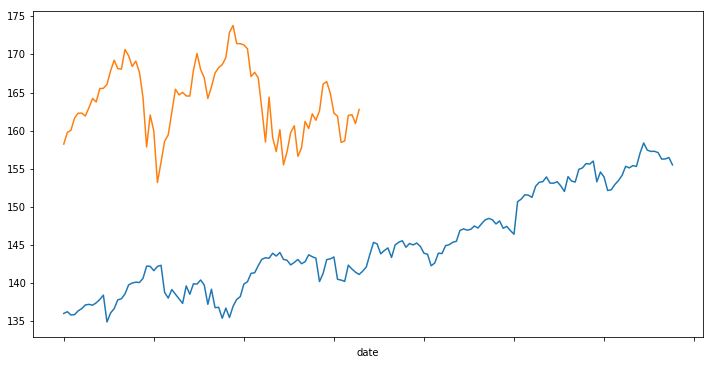

In [16]:
#Snapshot of the QQQ pricing, day to day from May 1st, 2017 until December 31st, 2017 & January 1st 2018 until May 1st, 2018.
px2 = web.DataReader('QQQ','iex','2017-05-01','2017-12-31')['close']
px3 = web.DataReader('QQQ','iex','2018-01-01','2018-05-01')['close']
plt.figure(); px2.plot(); px3.plot()

# Methods

## Future Contract Rolling application

In [7]:
from datetime import datetime
expiry = {'ESU2': datetime(2018, 9, 21),
          'ESZ2': datetime(2018, 12, 21)}
expiry = Series(expiry).sort_values()

In [8]:
expiry

ESU2   2018-09-21
ESZ2   2018-12-21
dtype: datetime64[ns]

In [9]:
np.random.seed(12347)
N = 200
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
walk = walk.cumsum()

rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

In [10]:
prices.tail()

,ESU2,ESZ2
2019-01-17,1657.05,1658.80
2019-01-18,1643.30,1645.55
2019-01-21,1651.30,1653.05
2019-01-22,1667.80,1667.05
2019-01-23,1647.80,1645.55


In [11]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names

    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)

    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.ix[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.ix[roll_rng, item] = 1 - decay_weights
            weights.ix[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.ix[prev_date:, item] = 1

        prev_date = ex_date

    return weights

In order to model a decision to rollover, settle, or offset a position, the cumulative return from current contract positions is calculated as follows:

> __RolloverReturn = PctChangeInPrice * Weight__

where __PctChangeInPrice__ is the incremental change in the daily average closing price;
and __Weight__ is a value that starts from 1 at the beginning of the the contract term and *decaying* to 0 as the contract approaches expiration.

When the cumulative sum of the __RolloverReturn__ over the life of a contract is greater thatn or equal to 0, we liquidate the *near* contract position to break-even or realize some gain. A negative would indicate a losing position and a decision to rollover to the *far* contract.

In [21]:
weights = get_roll_weights('6/1/2018', expiry, prices.columns)

/Users/albertasuncion_mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  del sys.path[0]


To illustrate how the rollover return is calculated, we take the weights for each contract the last 10 days leading up to the ESU2 expiry date of 9/21/2018. Since ESU2 expires on 9/21/2018, the weight decays from a value of 1 to a value of 0 at expiration. ESZ2 doesn't expire until 12/21/2018 and therefore carries a weight of 1.

In [32]:
weights.loc['2018-09-10':'2018-9-21']

,ESU2,ESZ2
2018-09-10,1.0,0.0
2018-09-11,1.0,0.0
2018-09-12,1.0,0.0
2018-09-13,1.0,0.0
2018-09-14,0.8,0.2
2018-09-17,0.6,0.4
2018-09-18,0.4,0.6
2018-09-19,0.2,0.8
2018-09-20,0.0,1.0
2018-09-21,0.0,1.0


In [33]:
prices.pct_change().loc['2018-09-10':'2018-9-21']

,ESU2,ESZ2
2018-09-10,0.003088,0.004029
2018-09-11,0.000000,0.000535
2018-09-12,-0.009100,-0.008958
2018-09-13,-0.007293,-0.009309
2018-09-14,-0.007347,-0.005311
2018-09-17,-0.004797,-0.005613
2018-09-18,-0.013359,-0.013630
2018-09-19,0.013400,0.013540
2018-09-20,0.013361,0.014323
2018-09-21,0.003262,0.001765


In [13]:
rolled_returns = (prices.pct_change() * weights).sum(1)

In [25]:
rolled_returns.loc['2018-09-10':'2018-09-21']

2018-09-10    0.003088
2018-09-11    0.000000
2018-09-12   -0.009100
2018-09-13   -0.007293
2018-09-14   -0.006940
2018-09-17   -0.005123
2018-09-18   -0.013522
2018-09-19    0.013512
2018-09-20    0.014323
2018-09-21    0.001765
Freq: B, dtype: float64

In [26]:
rolled_returns.loc['2018-09-10':'2018-12-21'].sum()

-0.11226466169990001

In [35]:
rolled_returns.loc['2018-06-1':'2018-9-21'].sum()

0.0341983406061801

## Results

*Results text placeholder*

## Future Work/Discussion/Conclusion

### Other Ways to calculate weights:

Some other aproaches that we found while doing our research about rolling future contracts and possible mechanisms to identify or generate weights in python was the "Rolling on Volume or present interest" which with the perpetual method, identify the roll date as the first day where volume of the far contract exceeds volume of the near contract, adjust the prices of the previous sessions ( last 3 or 4 sessions) to rill date by weithing the near and far contracts in increments and decrements of X% amount [4]. It looks like a very interested concept that we will like to try in future projects 



*Conclusion text placeholder*

__Bibliography__

[1] https://institute.cmegroup.com/courses/introduction-to-futures-html<br>
[2] https://en.wikipedia.org/wiki/Futures_contract<br>
[3] https://www.investopedia.com/ask/answers/061715/what-qqq-etf.asp<br>
[4] https://www.premiumdata.net/support/futurescontinuous.php<br>
